# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
!nvidia-smi

Wed May 25 21:48:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.95       Driver Version: 512.95       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:06:00.0  On |                  N/A |
| 35%   46C    P5    41W / 220W |   1307MiB /  8192MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import os
# from PIL import Image
# import imageio

# from scipy.misc import imread, imresize
from skimage import io
from skimage.transform import rescale, resize
import datetime
import os

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

We set the random seed so that the results don't vary drastically.

In [3]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())
batch_size = 16 #experiment with the batch size

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [5]:
# def generator(source_path, folder_list, batch_size):
#     print( 'Source path = ', source_path, '; batch size =', batch_size)
#     img_idx = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]#create a list of image numbers you want to use for a particular video
#     while True:
#         t = np.random.permutation(folder_list)
#         num_batches = len(source_path) // batch_size # calculate the number of batches
#         for batch in range(num_batches): # we iterate over the number of batches
#             batch_data = np.zeros((batch_size,15,100,100,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
#             batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
#             for folder in range(batch_size): # iterate over the batch_size
#                 imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                
#                 for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
#                     image = io.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
#                     #crop the images and resize them. Note that the images are of 2 different shape 
#                     #and the conv3D will throw error if the inputs in a batch have different shapes
                    
#                     if image.shape[1] == 160:
#                         image = resize(image[:,20:140,:],(100,100)).astype(np.float32) #cropping the (120X160) image to make (120X120)
#                     else:
                        
#                         image = resize(image,(100,100)).astype(np.float32)
                    
#                     batch_data[folder,idx,:,:,0] = image[:,:,0] / 255.0#normalise and feed in the image
#                     batch_data[folder,idx,:,:,1] = image[:,:,1] / 255.0#normalise and feed in the image
#                     batch_data[folder,idx,:,:,2] = image[:,:,2] / 255.0#normalise and feed in the image
                    
#                 batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
#             yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
#         # write the code for the remaining data points which are left after full batches
#         if(len(t)%batch_size != 0):
#             batch_data = np.zeros((len(t)%batch_size,15,100,100,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
#             batch_labels = np.zeros((len(t)%batch_size,5)) # batch_labels is the one hot representation of the output
#             for folder in range(len(t)%batch_size): # iterate over the batch_size
#                 imgs = os.listdir(source_path+'/'+ t[folder + (num_batches*(len(t)%batch_size))].split(';')[0]) # read all the images in the folder
                
#                 for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
#                     image = io.imread(source_path+'/'+ t[folder + (num_batches*(len(t)%batch_size))].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
#                     #crop the images and resize them. Note that the images are of 2 different shape 
#                     #and the conv3D will throw error if the inputs in a batch have different shapes
                    
#                     if image.shape[1] == 160:
#                         image = resize(image[:,20:140,:],(100,100)).astype(np.float32) #cropping the (120X160) image to make (120X120)
#                     else:
                        
#                         image = resize(image,(100,100)).astype(np.float32)
                        
#                     batch_data[folder,idx,:,:,0] = image[:,:,0] / 255.0#normalise and feed in the image
#                     batch_data[folder,idx,:,:,1] = image[:,:,1] / 255.0#normalise and feed in the image
#                     batch_data[folder,idx,:,:,2] = image[:,:,2] / 255.0#normalise and feed in the image
                    
#                 batch_labels[folder, int(t[folder + (num_batches*(len(t)%batch_size))].strip().split(';')[2])] = 1
#             yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

In [6]:
# [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

In [7]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(source_path)//batch_size # calculate the number of batches
        for batch in range(num_batches):
            batch_data = np.zeros((batch_size,30,100,100,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size):
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx):
                    image = io.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    if image.shape[1] == 160:
                        image = resize(image[:,20:140,:],(100,100)).astype(np.float32) #cropping the (120X160) image to make (120X120)
                    else:
                        # print("")
                        image = resize(image,(100,100)).astype(np.float32)
                    # Normalizing RGB image with mean subtraction 
                    batch_data[folder,idx,:,:,0] = image[:,:,0] / 255.0
                    batch_data[folder,idx,:,:,1] = image[:,:,1] / 255.0
                    batch_data[folder,idx,:,:,2] = image[:,:,2] / 255.0
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do


        
        # write the code for the remaining data points which are left after full batches
        if(len(t)%batch_size!=0):
            batch_data = np.zeros((len(t)%batch_size,30,100,100,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((len(t)%batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(len(t)%batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (num_batches*(len(t)%batch_size))].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = io.imread(source_path+'/'+ t[folder + (num_batches*(len(t)%batch_size))].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    if image.shape[1] == 160:
                        image = resize(image[:,20:140,:],(100,100)).astype(np.float32)
                    else:
                        image = resize(image,(100,100)).astype(np.float32)
                    # Normalizing RGB image with mean subtraction
                    batch_data[folder,idx,:,:,0] = image[:,:,0] / 255.0
                    batch_data[folder,idx,:,:,1] = image[:,:,1] / 255.0
                    batch_data[folder,idx,:,:,2] = image[:,:,2] / 255.0
                                        
                batch_labels[folder, int(t[folder + (num_batches*(len(t)%batch_size))].strip().split(';')[2])] = 1
            yield batch_data, batch_labels

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [8]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 30# choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout

from tensorflow.keras.layers import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LSTM
# #write your model here
# Input_shape = (30, 100, 100, 3)

# model = Sequential()
# model.add(Conv3D(64, (3,3,3), padding='same', input_shape=(30,100,100,3)))
# model.add(MaxPooling3D(pool_size=(2,2,1), strides=(2,2,2)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))


# model.add(Conv3D(128, (3,3,3), padding='same'))
# model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))


# model.add(Conv3D(256, (3,3,3), padding='same'))
# model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))


# model.add(Conv3D(256, (3,3,3), padding='same'))
# model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))


# # model.add(Conv3D(128, (3,3,3), padding='same'))
# # model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2)))
# # model.add(BatchNormalization())
# # model.add(Activation('relu'))


# model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

# model = Sequential()
# model.add(Conv3D(32, (3, 3, 3), padding='same', input_shape=(18,100,100,3)))
# model.add(BatchNormalization())
# model.add(Activation('relu')) #can use elu as well
# model.add(MaxPooling3D(pool_size=(2,2,2)))

# model.add(Conv3D(64, (3, 3, 3), padding='same', input_shape=(18,100,100,3)))
# model.add(BatchNormalization())
# model.add(Activation('relu')) #can use elu as well
# model.add(MaxPooling3D(pool_size=(2,2,2)))

# model.add(Conv3D(128, (3, 3, 3), padding='same', input_shape=(18,100,100,3)))
# model.add(BatchNormalization())
# model.add(Activation('relu')) #can use elu as well
# model.add(MaxPooling3D(pool_size=(2,2,2)))

# model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))
# model.add(Activation('relu'))
# model.add(Dense(5)) #Look at dropout
# model.add(Activation('softmax'))
# #write your model here



In [10]:
# model = Sequential()

# model.add(TimeDistributed(Conv2D(16, (3, 3) , padding='same', activation='relu'),
#                             input_shape=(18,100,100,3)))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D((2, 2))))

# model.add(TimeDistributed(Conv2D(32, (3, 3) , padding='same', activation='relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D((2, 2))))

# model.add(TimeDistributed(Conv2D(64, (3, 3) , padding='same', activation='relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D((2, 2))))

# model.add(TimeDistributed(Conv2D(128, (3, 3) , padding='same', activation='relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D((2, 2))))

# model.add(TimeDistributed(Conv2D(256, (3, 3) , padding='same', activation='relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D((2, 2))))

# #model.add(TimeDistributed(Conv2D(512, (2, 2) , padding='valid', activation='relu')))
# # model.add(TimeDistributed(BatchNormalization()))
# # model.add(TimeDistributed(MaxPooling2D((2, 2))))

# model.add(TimeDistributed(Flatten()))


# model.add(LSTM(128))
# model.add(Dropout(0.25))

# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.25))

# model.add(Dense(5, activation='softmax'))

In [11]:
model = Sequential()

model.add(TimeDistributed(Conv2D(16, (3, 3) , padding='same', activation='relu'),
                            input_shape=(30,100,100,3)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(32, (3, 3) , padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(64, (3, 3) , padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(128, (3, 3) , padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Conv2D(128, (3, 3) , padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Dropout(0.25)))


model.add(TimeDistributed(Flatten()))


model.add(GRU(128))
model.add(Dropout(0.25))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [12]:
optimiser = optimizers.SGD(lr=0.001, decay=1e-6) #write your optimizer
# optimiser = optimizers.Adam()
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 30, 100, 100, 16)  448       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 50, 50, 16)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 50, 50, 16)    64        
_________________________________________________________________
time_distributed_3 (TimeDist (None, 30, 50, 50, 16)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 50, 50, 32)    4640      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 30, 25, 25, 32)    0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 30, 25, 25, 32)    1

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [13]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [14]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min', min_delta=0.0001, cooldown=0, min_lr=0.00001)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [15]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [16]:
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 16
Epoch 1/30
42/42 [==============================] - 101s 2s/step - loss: 1.6970 - categorical_accuracy: 0.2195 - val_loss: 1.6847 - val_categorical_accuracy: 0.1447

Epoch 00001: saving model to model_init_2022-05-2521_49_00.765099\model-00001-1.69702-0.21946-1.68466-0.14474.h5
Epoch 2/30
42/42 [==============================] - 100s 2s/step - loss: 1.6419 - categorical_accuracy: 0.2340 - val_loss: 1.6981 - val_categorical_accuracy: 0.1579

Epoch 00002: saving model to model_init_2022-05-2521_49_00.765099\model-00002-1.64194-0.23395-1.69807-0.15789.h5
Epoch 3/30
42/42 [==============================] - 89s 2s/step - loss: 1.5916 - categorical_accuracy: 0.2671 - val_loss: 1.7471 - val_categorical_accuracy: 0.1579

Epoch 00003: saving model to model_init_2022-05-2521_49_00.765099\model-00003-1.59165-0.26708-1.74707-0.15789.h5

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/30
42/42 [=============

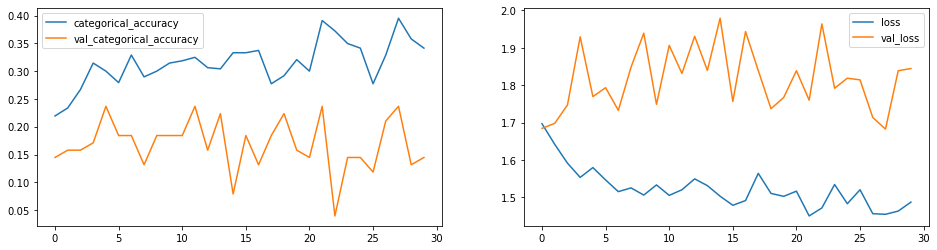

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
axes[0].plot(history.history['categorical_accuracy'])   
axes[0].plot(history.history['val_categorical_accuracy'])
axes[0].legend(['categorical_accuracy','val_categorical_accuracy'])

axes[1].plot(history.history['loss'])   
axes[1].plot(history.history['val_loss'])
axes[1].legend(['loss','val_loss'])